In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import colormaps as cmaps
import distinctipy as dpy
import numpy as np

In [3]:
df_tsne = pd.read_csv("..\data\\plot_data\\villarica\\agren_hc\\emb32_s_emb_tsne.csv")
df_cs = pd.read_csv("..\data\\plot_data\\villarica\\agren_hc\\agren_hc_cell_system.csv")

FileNotFoundError: [Errno 2] No such file or directory: '..\\data\\plot_data\\villarica\\agren_hc\\emb32_s_emb_tsne.csv'

In [4]:
system_cmaps = {}

def get_system_size(system):
    return df_cs[df_cs['System'] == system]["Cell"].unique().size

def add_system_cmap(system, cmap, range=(0.25, 0.75)):
    n = get_system_size(system)
    size = int(n / (range[1] - range[0]))

    system_cmaps[system] = cmap.discrete(size)[int(range[0] * size) : int(range[1] * size)]

def make_system_cmap():
    add_system_cmap("SOFT TISSUE", cmaps.green_green1, range=(0.1, 0.3))
    add_system_cmap("GLANDULAR", cmaps.oryell2, range=(0.2, 0.5))
    add_system_cmap("REPRODUCTIVE", cmaps.ice, range=(0.5, 0.8))
    add_system_cmap("NERVOUS", cmaps.l_purpwarm2, range=(0.0, 0.4))
    add_system_cmap("DIGESTIVE", cmaps.fushia_red_pink1, range=(0.2,0.4))
    add_system_cmap("MUSCLE", cmaps.matter, range=(0.7,0.8))
    add_system_cmap("KIDNEY/PANCREAS", cmaps.gothic, range=(0.5,0.6))
    add_system_cmap("LIVER", cmaps.lavender, range=(0.8,0.9))
    add_system_cmap("BONE", cmaps.sunburst, range=(0.4,0.6))
    add_system_cmap("BREAST", cmaps.cet_l_kbc, range=(0.8,0.9))
    add_system_cmap("RESPIRATORY", cmaps.sapphire, range=(0.4,0.6))
    add_system_cmap("IMMUNE", cmaps.cet_l_bmy, range=(0.5,0.6))
    add_system_cmap("SKIN", cmaps.savanna, range=(0.7,0.9))

make_system_cmap()

def view_system_cmap():
    n = len(system_cmaps)
    s = int(np.sqrt(n))
    fig, axs2 = plt.subplots(n // s + 1, s)
    axs = []
    for axr in axs2:
        for ax in axr:
            axs.append(ax)

    for (system, cmap), ax in zip(system_cmaps.items(), axs):
        x = np.linspace(np.zeros(8), np.ones(8), get_system_size(system))
        ax.imshow(x, cmap=cmap, aspect='auto')
        ax.set_title(system)

    fig.tight_layout()


for system, cmap in system_cmaps.items():
    system_cmaps[system] = cmap.colors

cells = df_cs['Cell'].unique()
cell_colors = {cell:col for cell, col in zip(cells, dpy.get_colors(len(cells)))}

NameError: name 'df_cs' is not defined

NameError: name 'df_tsne' is not defined

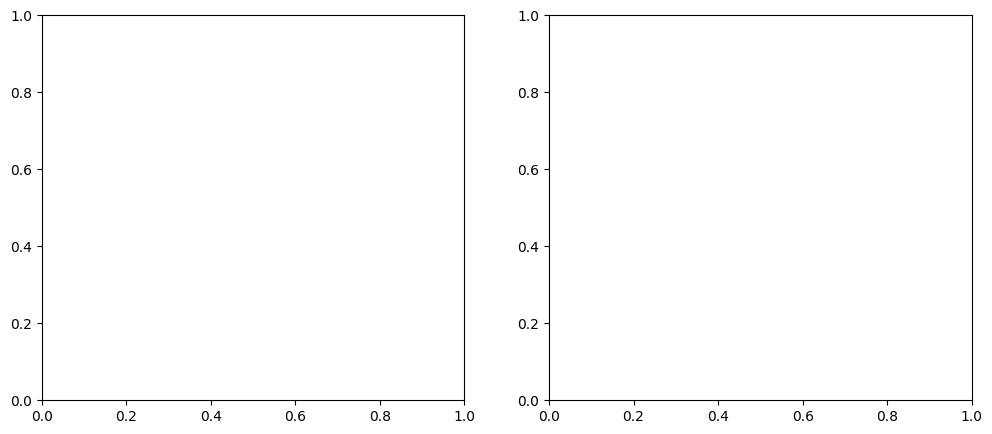

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

def get_system(cell):
    return df_cs[df_cs['Cell'] == cell]['System'].unique()[0]

def get_color(cell):
    system = get_system(cell)
    id = list(df_cs[df_cs['System'] == system]['Cell'].unique()).index(cell)

    return system_cmaps[system][id]

for label, df in df_tsne.groupby("label"):
    cell = label.replace('_', ' ').removesuffix(' 2')
    ax1.scatter(df['tsne0'], df['tsne1'], s=0.3, c=cell_colors[cell], label=cell)
    ax2.scatter(df['tsne0'], df['tsne1'], s=0.3, c=get_color(cell))

for system, cmap in system_cmaps.items():
    ax2.plot([0], [0], label=system, c=cmap[0])

ax1.set_title("By Cell Type")
ax2.set_title("By System")

lgnd = ax2.legend(bbox_to_anchor=(1.0, 0.5, 0.0, 0.5), fontsize=10)
lgnd.set_title("System")

fig.suptitle("T-SNE For Embedding With 32-Dimensions (78 GEMs)", fontsize=16)
fig.tight_layout()

plt.savefig("../data/plots/agren_hc/emb32_s_tsne12.png", dpi=600)

